<a href="https://colab.research.google.com/github/SilvioCesarTeixeira/PJI4/blob/master/PJI4_UBS_VilaEde_QA_SRGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instalar Bibliotecas

In [102]:
!pip install openpyxl
!pip install pyexcel
!pip install sweetviz
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importar pacotes

In [103]:
import pandas as pd
import numpy as np
#from google.colab import files
import io
import openpyxl
import sweetviz as sv
import seaborn as sns
import matplotlib.pyplot as plt

Código para upload de arquivo instalado no computador

In [104]:
#uploaded = files.upload()

Referenciar base de dados existente rede

In [105]:
url_SG = r'https://github.com/SilvioCesarTeixeira/PJI4/raw/master/SRAG_SubP_SP.xlsx'
url_QA = r'https://github.com/SilvioCesarTeixeira/PJI4/raw/master/Santana_SP_AQI.xlsx'

Criar Dataframes

In [106]:
df1 = pd.read_excel(url_QA, engine='openpyxl')
df2 = pd.read_excel(url_SG, engine='openpyxl')
df2

,COVID19 S�ndrome Respirat�ria Aguda Grave (SRAG),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35
0,N� de Casos por Ano M�s Dia Notifica��o e Subp...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Per�odo:2020-2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ano M�s Dia Notifica��o,ARICANDUVA/FORMOSA/CARRAO,BUTANTA,CAMPO LIMPO,CAPELA DO SOCORRO,CASA VERDE/CACHOEIRINHA,CIDADE ADEMAR,CIDADE TIRADENTES,ERMELINO MATARAZZO,FREGUESIA/BRASILANDIA,...,SAO MATEUS,SAO MIGUEL,SAPOPEMBA,SE,VILA MARIA/VILA GUILHERME,VILA MARIANA,VILA PRUDENTE,N�o localizado,Localizado fora do MSP,Total
3,01/01/2020,-,1,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,2
4,02/01/2020,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,16/03/2023,-,-,1,-,-,-,-,-,-,...,-,-,-,1,-,-,-,-,-,2
1164,Total,7630,11025,16107,14646,7806,10027,3824,5003,9601,...,9117,8919,6802,13368,8270,10806,7011,8556,130,301198
1165,Fonte: SIVEP GRIPE/DVE/COVISA/SMS-SP. Data de ...,sujeitos a altera��o.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1166,Nota:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Definir a linha zero do dataframe 1 como título das colunas

In [107]:
df1
df1.columns = df1.iloc[0]
df1 = df1.reindex(df1.index.drop(0))
df1

,date,pm25,pm10,o3,no2,so2,co
1,2023/3/8,35,,24,,,
2,2023/3/9,47,,2,,,
3,2023/3/10,50,,18,,,
4,2023/3/11,52,,23,,,
5,2023/3/12,37,,14,,,
...,...,...,...,...,...,...,...
3267,2014/11/24,,,24,,,
3268,2014/11/25,,,28,,,
3269,2014/1/1,,,22,,,
3270,2019/2/10,,,,9,,


In [108]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3271 entries, 1 to 3271
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    3271 non-null   object
 1    pm25   3271 non-null   object
 2    pm10   3271 non-null   object
 3    o3     3271 non-null   object
 4    no2    3271 non-null   object
 5    so2    3271 non-null   object
 6    co     3271 non-null   object
dtypes: object(7)
memory usage: 179.0+ KB


In [109]:
df1.describe()

,date,pm25,pm10,o3,no2,so2,co
count,3271,3271,3271,3271,3271,3271,3271
unique,3271,113,75,89,39,6,13
top,2023/3/8,,,28,,,
freq,1,1342,2011,104,2814,3088,3148


Definindo a primeira coluna como data com padrão Português do Brasil

In [110]:
df_QA = df1
df_QA['Data'] = pd.to_datetime(df1['date'], format='%Y/%m/%d').dt.strftime('%d/%m/%Y')
col_Data_Brasil = df_QA.iloc[:, -1]
df_QA = df_QA.iloc[:, 1:-1]
df_QA.insert(loc=0, column='Data', value=col_Data_Brasil)
df_QA

,Data,pm25,pm10,o3,no2,so2,co
1,08/03/2023,35,,24,,,
2,09/03/2023,47,,2,,,
3,10/03/2023,50,,18,,,
4,11/03/2023,52,,23,,,
5,12/03/2023,37,,14,,,
...,...,...,...,...,...,...,...
3267,24/11/2014,,,24,,,
3268,25/11/2014,,,28,,,
3269,01/01/2014,,,22,,,
3270,10/02/2019,,,,9,,


Remover linhas desnecessárias e renomear coluna do dataframe 2

In [111]:
df_SRAG = df2
df_SRAG.columns = df_SRAG.iloc[2]
linhas_remover = list(range(0,3)) + list(range(1164,1168))
df_SRAG = df_SRAG.reindex(df_SRAG.index.drop(linhas_remover))
df_SRAG = df_SRAG.rename(columns={'Ano M�s Dia Notifica��o': 'Data'})
df_SRAG

2,Data,ARICANDUVA/FORMOSA/CARRAO,BUTANTA,CAMPO LIMPO,CAPELA DO SOCORRO,CASA VERDE/CACHOEIRINHA,CIDADE ADEMAR,CIDADE TIRADENTES,ERMELINO MATARAZZO,FREGUESIA/BRASILANDIA,...,SAO MATEUS,SAO MIGUEL,SAPOPEMBA,SE,VILA MARIA/VILA GUILHERME,VILA MARIANA,VILA PRUDENTE,N�o localizado,Localizado fora do MSP,Total
3,01/01/2020,-,1,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,2
4,02/01/2020,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,4
5,03/01/2020,-,-,2,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,3
6,05/01/2020,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,2
7,06/01/2020,-,1,1,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159,12/03/2023,-,-,3,-,-,1,-,1,-,...,-,1,-,2,1,1,1,3,-,21
1160,13/03/2023,2,1,8,3,2,-,-,-,7,...,2,1,2,6,2,10,-,2,-,94
1161,14/03/2023,1,5,13,2,-,3,-,2,1,...,-,-,2,6,5,8,2,1,-,91
1162,15/03/2023,5,7,1,1,1,1,-,-,3,...,2,1,3,1,2,2,1,4,-,82


In [112]:
df_SRAG.describe()

2,Data,ARICANDUVA/FORMOSA/CARRAO,BUTANTA,CAMPO LIMPO,CAPELA DO SOCORRO,CASA VERDE/CACHOEIRINHA,CIDADE ADEMAR,CIDADE TIRADENTES,ERMELINO MATARAZZO,FREGUESIA/BRASILANDIA,...,SAO MATEUS,SAO MIGUEL,SAPOPEMBA,SE,VILA MARIA/VILA GUILHERME,VILA MARIANA,VILA PRUDENTE,N�o localizado,Localizado fora do MSP,Total
count,1161,1161,1161,1161,1161,1161,1161,1161,1161,1161,...,1161,1161,1161,1161,1161,1161,1161,1161,1161,1161
unique,1161,37,41,56,58,36,43,22,25,42,...,45,42,36,54,41,41,33,43,6,541
top,01/01/2020,-,1,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,1
freq,1,171,112,69,121,166,135,330,280,134,...,148,174,189,83,169,115,175,124,1065,11


Juntar os dois dataframes, mas mantendo apenas as datas que coincidem

In [193]:
df_SRAG = df_SRAG.loc[:, ['Data', 'VILA MARIA/VILA GUILHERME']]
df_base = pd.merge(df_QA, df_SRAG, how='inner', on='Data')

Definir uma data de corte

In [194]:
data_limite = '01/01/2020'
#df_base['Data'] = pd.to_datetime(df_base['Data'], format='%d/%m/%Y')
df_base = df_base.loc[df_base['Data'] > data_limite]

Analisar o conteúdo e os tipos de dados do dataframe base

In [195]:
df_base.describe()

,Data,pm25,pm10,o3,no2,so2,co,VILA MARIA/VILA GUILHERME
count,1126,1126,1126,1126,1126,1126,1126,1126
unique,1126,109,1,72,1,1,1,40
top,08/03/2023,,,15,,,,-
freq,1,94,1126,44,1126,1126,1126,164


In [196]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1126 entries, 0 to 1126
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Data                       1126 non-null   object
 1    pm25                      1126 non-null   object
 2    pm10                      1126 non-null   object
 3    o3                        1126 non-null   object
 4    no2                       1126 non-null   object
 5    so2                       1126 non-null   object
 6    co                        1126 non-null   object
 7   VILA MARIA/VILA GUILHERME  1126 non-null   object
dtypes: object(8)
memory usage: 79.2+ KB


In [197]:
df_base

,Data,pm25,pm10,o3,no2,so2,co,VILA MARIA/VILA GUILHERME
0,08/03/2023,35,,24,,,,3
1,09/03/2023,47,,2,,,,-
2,10/03/2023,50,,18,,,,-
3,11/03/2023,52,,23,,,,2
4,12/03/2023,37,,14,,,,1
...,...,...,...,...,...,...,...,...
1122,24/03/2020,,,20,,,,22
1123,25/03/2020,,,28,,,,18
1124,26/03/2020,,,33,,,,17
1125,27/03/2020,,,30,,,,20


Renomear colunas com titulo extenso e converter strings em tipos numericos

In [198]:
df_base = df_base.rename(columns={' pm25':'PM25',' o3':'O3','VILA MARIA/VILA GUILHERME': 'VM_SRAG'})
df_base['PM25'] = pd.to_numeric(df_base['PM25'], errors='coerce')
df_base[' pm10'] = pd.to_numeric(df_base[' pm10'], errors='coerce')
df_base['O3'] = pd.to_numeric(df_base['O3'], errors='coerce')
df_base[' no2'] = pd.to_numeric(df_base[' no2'], errors='coerce')
df_base['VM_SRAG'] = pd.to_numeric(df_base['VM_SRAG'], errors='coerce')

In [199]:
df_base.describe()

,PM25,pm10,O3,no2,VM_SRAG
count,1032.000000,0.0,1109.000000,0.0,962.000000
mean,52.304264,NaN,27.007214,NaN,8.233888
std,22.693557,NaN,12.613096,NaN,7.283209
min,5.000000,NaN,1.000000,NaN,1.000000
25%,36.000000,NaN,18.000000,NaN,3.000000
50%,49.000000,NaN,26.000000,NaN,6.000000
75%,64.250000,NaN,33.000000,NaN,12.000000
max,245.000000,NaN,88.000000,NaN,48.000000


Definir um dataframe base apenas com as colunas que contenham dados em quase todas as linhas

In [200]:
df_base = df_base.loc[:, ['Data', 'PM25', 'O3','VM_SRAG']]

In [201]:
df_base

,Data,PM25,O3,VM_SRAG
0,08/03/2023,35.0,24.0,3.0
1,09/03/2023,47.0,2.0,NaN
2,10/03/2023,50.0,18.0,NaN
3,11/03/2023,52.0,23.0,2.0
4,12/03/2023,37.0,14.0,1.0
...,...,...,...,...
1122,24/03/2020,NaN,20.0,22.0
1123,25/03/2020,NaN,28.0,18.0
1124,26/03/2020,NaN,33.0,17.0
1125,27/03/2020,NaN,30.0,20.0


In [202]:
df_base.head()

,Data,PM25,O3,VM_SRAG
0,08/03/2023,35.0,24.0,3.0
1,09/03/2023,47.0,2.0,NaN
2,10/03/2023,50.0,18.0,NaN
3,11/03/2023,52.0,23.0,2.0
4,12/03/2023,37.0,14.0,1.0


In [203]:
df_base.tail()

,Data,PM25,O3,VM_SRAG
1122,24/03/2020,NaN,20.0,22.0
1123,25/03/2020,NaN,28.0,18.0
1124,26/03/2020,NaN,33.0,17.0
1125,27/03/2020,NaN,30.0,20.0
1126,28/03/2020,NaN,35.0,6.0


Utilizar o sweetviz para gerar um relatório com as estatísticas dos dados

In [204]:
relatorio = sv.analyze(df_base, pairwise_analysis='off')
relatorio.show_html('Relatorio.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Relatorio.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Preencher os valores NaN (não numéricos) com a média de cada variável

In [205]:
df_base['PM25'].fillna(value=df_base['PM25'].mean(), inplace=True)
df_base['O3'].fillna(value=df_base['O3'].mean(), inplace=True)
df_base['VM_SRAG'].fillna(value=df_base['VM_SRAG'].mean(), inplace=True)

In [ ]:
# Substituir NaN pela mediana
#mediana = df['Atributo1'].median()
#df['Atributo1'].fillna(mediana, inplace=True)

# Substituir NaN pela moda
#moda = df['Atributo1'].mode()[0] # O método mode() retorna uma série, pegamos o primeiro elemento
#df['Atributo1'].fillna(moda, inplace=True)

In [206]:
df_base

,Data,PM25,O3,VM_SRAG
0,08/03/2023,35.000000,24.0,3.000000
1,09/03/2023,47.000000,2.0,8.233888
2,10/03/2023,50.000000,18.0,8.233888
3,11/03/2023,52.000000,23.0,2.000000
4,12/03/2023,37.000000,14.0,1.000000
...,...,...,...,...
1122,24/03/2020,52.304264,20.0,22.000000
1123,25/03/2020,52.304264,28.0,18.000000
1124,26/03/2020,52.304264,33.0,17.000000
1125,27/03/2020,52.304264,30.0,20.000000


Normalizar os dados aplicando uma transformação MinMax com intevalo de 0 até 1

In [207]:
df_base.info()

# definir função de normalização de logaritmo
#def normalizar_df_com_log(x):
    #return np.log(x) / np.max(np.log(x))

# aplicar a função de normalização as colunas PM25, O3 e VM_SRAG
#df_base['PM25'] = df_base['PM25'].apply(normalizar_df_com_log)
#df_base['O3'] = df_base['O3'].apply(normalizar_df_com_log)
#df_base['VM_SRAG'] = df_base['VM_SRAG'].apply(normalizar_df_com_log)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1126 entries, 0 to 1126
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Data     1126 non-null   object 
 1   PM25     1126 non-null   float64
 2   O3       1126 non-null   float64
 3   VM_SRAG  1126 non-null   float64
dtypes: float64(3), object(1)
memory usage: 44.0+ KB


In [209]:
df_base = df_norm.reindex(df_norm.index.drop(1126))
df_base = df_norm.reindex(df_norm.index.drop(1114))

In [210]:
df_base

,Data,PM25,O3,VM_SRAG
0,08/03/2023,0.125000,0.264368,0.042553
1,09/03/2023,0.175000,0.011494,0.153913
2,10/03/2023,0.187500,0.195402,0.153913
3,11/03/2023,0.195833,0.252874,0.021277
4,12/03/2023,0.133333,0.149425,0.000000
...,...,...,...,...
1122,24/03/2020,0.197101,0.310345,0.361702
1123,25/03/2020,0.197101,0.367816,0.340426
1124,26/03/2020,0.197101,0.333333,0.404255
1125,27/03/2020,0.197101,0.390805,0.106383


Gerar uma matriz de correlação entre as variáveis do dataframe base

In [211]:
corr_matriz1 = df_base.corr()

Plotar o Mapa de Calor com as correlações calculadas

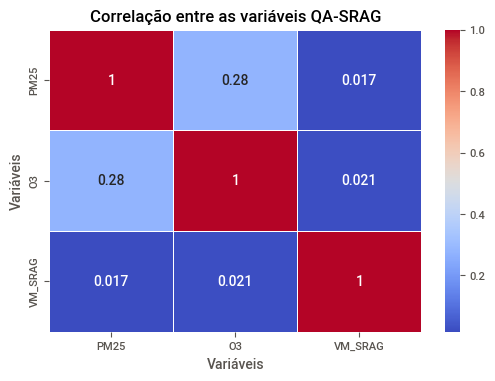

In [212]:
sns.heatmap(corr_matriz1, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlação entre as variáveis QA-SRAG')
plt.xlabel('Variáveis')
plt.ylabel('Variáveis')
plt.show()

Plotar gráfico com dados do dataframe ao longo dos anos de 2020 a 2023.

In [213]:
df_base['Data'] = pd.to_datetime(df_base['Data'], format='%d/%m/%Y')

In [214]:
df_base.dtypes

Data       datetime64[ns]
PM25              float64
O3                float64
VM_SRAG           float64
dtype: object

Ajustando um dataframe ordenado por ano, com a soma de todos os casos por mês

In [215]:
df_base_mmAAAA = df_base.groupby([df_base['Data'].dt.year, df_base['Data'].dt.month])['VM_SRAG'].sum()

In [216]:
df_base_mmAAAA

Data  Data
2020  1        3.539988
      2        2.924338
      3        5.458995
      4        8.446809
      5       10.404255
      6       10.680851
      7        8.127660
      8        6.680851
      9        5.255319
      10       3.286548
      11       4.404255
      12       6.127660
2021  1        6.276596
      2        4.787234
      3       11.148936
      4        9.659574
      5        8.829787
      6        6.361702
      7        5.260295
      8        3.255319
      9        3.090083
      10       2.183771
      11       1.748286
      12       2.440461
2022  1        5.856040
      2        2.514243
      3        2.061087
      4        2.144822
      5        1.440461
      6        3.402884
      7        2.105012
      8        1.424161
      9        2.049763
      10       2.229929
      11       1.818463
      12       1.646879
2023  1        1.943380
      2        1.571726
      3        0.695780
Name: VM_SRAG, dtype: float64

Plotando gráfico de internação por mês/ano

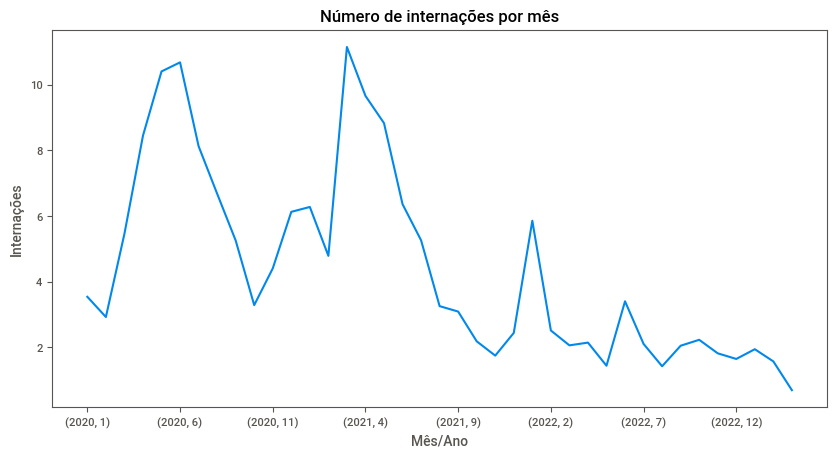

In [217]:
df_base_mmAAAA.plot(kind='line', figsize=(10, 5))
plt.title('Número de internações por mês')
plt.xlabel('Mês/Ano')
plt.ylabel('Internações')
plt.show()

In [208]:
from sklearn.preprocessing import MinMaxScaler

# Criar instância do MinMaxScaler
scaler = MinMaxScaler()

#Cria um dataframe apenas com dados numéricos
df_num = df_base.select_dtypes(include=['float64'])

# Normaliza os dados do DataFrame com dados numéricos
df_num = pd.DataFrame(scaler.fit_transform(df_num), columns=df_num.columns)

# Combina os dados normalizados com a coluna de data
df_norm = pd.concat([df_base['Data'], df_num], axis=1)

df_norm

,Data,PM25,O3,VM_SRAG
0,08/03/2023,0.125000,0.264368,0.042553
1,09/03/2023,0.175000,0.011494,0.153913
2,10/03/2023,0.187500,0.195402,0.153913
3,11/03/2023,0.195833,0.252874,0.021277
4,12/03/2023,0.133333,0.149425,0.000000
...,...,...,...,...
1123,25/03/2020,0.197101,0.367816,0.340426
1124,26/03/2020,0.197101,0.333333,0.404255
1125,27/03/2020,0.197101,0.390805,0.106383
1126,28/03/2020,NaN,NaN,NaN
